In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
from collections import Counter


In [3]:
# Define paths
lung_paths = [
    r"C:\Users\HP\Desktop\RR PAPER\Lung and Colon Cancer\lung_scc",
    r"C:\Users\HP\Desktop\RR PAPER\Lung and Colon Cancer\lung_bnt",
    r"C:\Users\HP\Desktop\RR PAPER\Lung and Colon Cancer\lung_aca"
]

breast_paths = [
    r"C:\Users\HP\Desktop\RR PAPER\Breast Cancer\breast_benign",
    r"C:\Users\HP\Desktop\RR PAPER\Breast Cancer\breast_malignant"
]


In [4]:
# dictionaries to store statistics
lung_stats = {
    'total_images': 0,
    'class_distribution': {},
    'image_sizes': [],
    'aspect_ratios': [],
    'mean_intensities': [],
    'std_intensities': [],
    'file_sizes': []
}

breast_stats = {
    'total_images': 0,
    'class_distribution': {},
    'image_sizes': [],
    'aspect_ratios': [],
    'mean_intensities': [],
    'std_intensities': [],
    'file_sizes': []
}

## EDA

In [5]:
# Dictionary to sample images
lung_samples = {}
breast_samples = {}

In [6]:
# Analyze Lung Cancer Dataset
print("\n=== Lung Cancer Dataset Analysis ===")
for path in lung_paths:
    class_name = os.path.basename(path)
    images_count = 0
    
    print(f"\nAnalyzing {class_name}...")
    
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        
        # Read image
        img = cv2.imread(img_path)
        if img is None:
            continue
            
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Store first image as sample
        if images_count == 0:
            lung_samples[class_name] = img
        
        # Update statistics
        lung_stats['image_sizes'].append(img.shape[:2])
        lung_stats['aspect_ratios'].append(img.shape[1] / img.shape[0])
        lung_stats['mean_intensities'].append(np.mean(img))
        lung_stats['std_intensities'].append(np.std(img))
        lung_stats['file_sizes'].append(os.path.getsize(img_path) / 1024)  # Size in KB
        
        images_count += 1
        
    lung_stats['class_distribution'][class_name] = images_count
    lung_stats['total_images'] += images_count



=== Lung Cancer Dataset Analysis ===

Analyzing lung_scc...

Analyzing lung_bnt...

Analyzing lung_aca...


In [7]:
# Analyze Breast Cancer Dataset
print("\n=== Breast Cancer Dataset Analysis ===")
for path in breast_paths:
    class_name = os.path.basename(path)
    images_count = 0
    
    print(f"\nAnalyzing {class_name}...")
    
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        
        # Read image
        img = cv2.imread(img_path)
        if img is None:
            continue
            
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Store first image as sample
        if images_count == 0:
            breast_samples[class_name] = img
        
        # Update statistics
        breast_stats['image_sizes'].append(img.shape[:2])
        breast_stats['aspect_ratios'].append(img.shape[1] / img.shape[0])
        breast_stats['mean_intensities'].append(np.mean(img))
        breast_stats['std_intensities'].append(np.std(img))
        breast_stats['file_sizes'].append(os.path.getsize(img_path) / 1024)  # Size in KB
        
        images_count += 1
        
    breast_stats['class_distribution'][class_name] = images_count
    breast_stats['total_images'] += images_count



=== Breast Cancer Dataset Analysis ===

Analyzing breast_benign...

Analyzing breast_malignant...


In [8]:
# Print Basic Statistics
print("\n=== Dataset Summary ===")
print("\nLung Cancer Dataset:")
print(f"Total images: {lung_stats['total_images']}")
print("\nClass distribution:")
for class_name, count in lung_stats['class_distribution'].items():
    percentage = (count/lung_stats['total_images'])*100
    print(f"{class_name}: {count} images ({percentage:.2f}%)")



=== Dataset Summary ===

Lung Cancer Dataset:
Total images: 15000

Class distribution:
lung_scc: 5000 images (33.33%)
lung_bnt: 5000 images (33.33%)
lung_aca: 5000 images (33.33%)


In [9]:
print("\nBreast Cancer Dataset:")
print(f"Total images: {breast_stats['total_images']}")
print("\nClass distribution:")
for class_name, count in breast_stats['class_distribution'].items():
    percentage = (count/breast_stats['total_images'])*100
    print(f"{class_name}: {count} images ({percentage:.2f}%)")


Breast Cancer Dataset:
Total images: 10000

Class distribution:
breast_benign: 5000 images (50.00%)
breast_malignant: 5000 images (50.00%)


## Visualizations

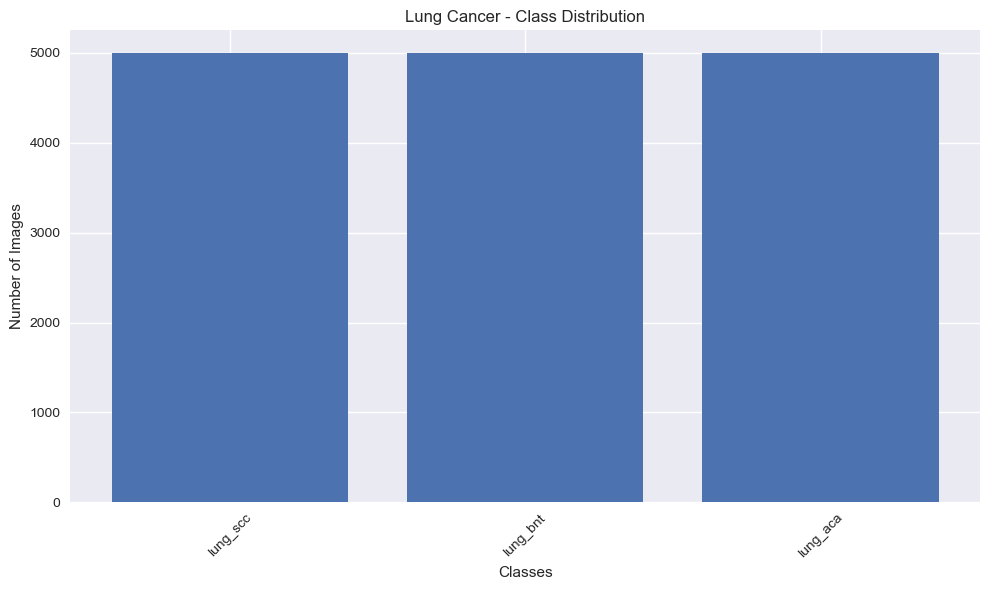

In [10]:
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn')
# 1. Lung Cancer Class Distribution
plt.figure(figsize=(10, 6))
plt.bar(lung_stats['class_distribution'].keys(), lung_stats['class_distribution'].values())
plt.title('Lung Cancer - Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()


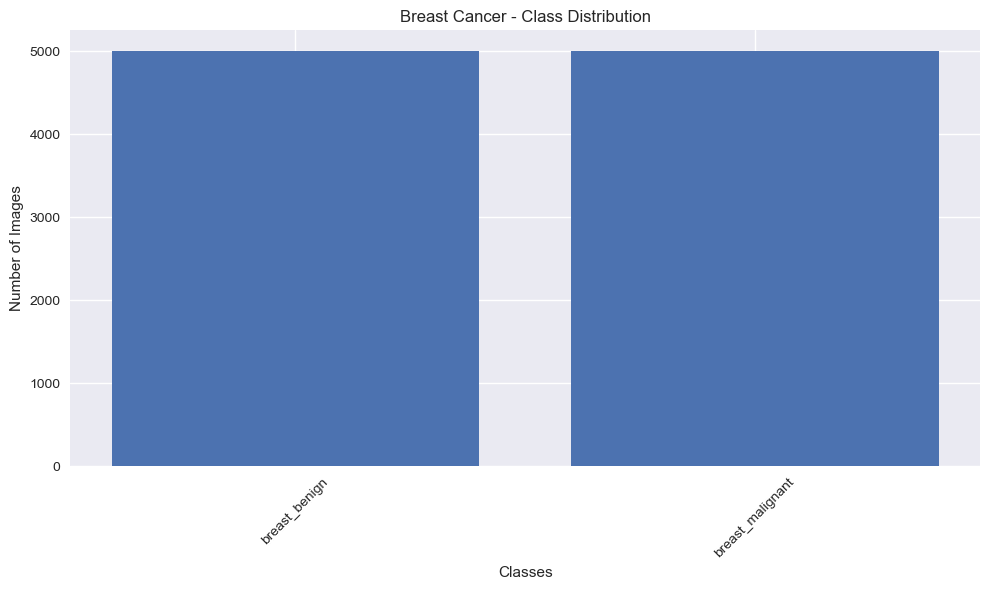

In [11]:
# Breast Cancer Class Distribution
plt.figure(figsize=(10, 6))
plt.bar(breast_stats['class_distribution'].keys(), breast_stats['class_distribution'].values())
plt.title('Breast Cancer - Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

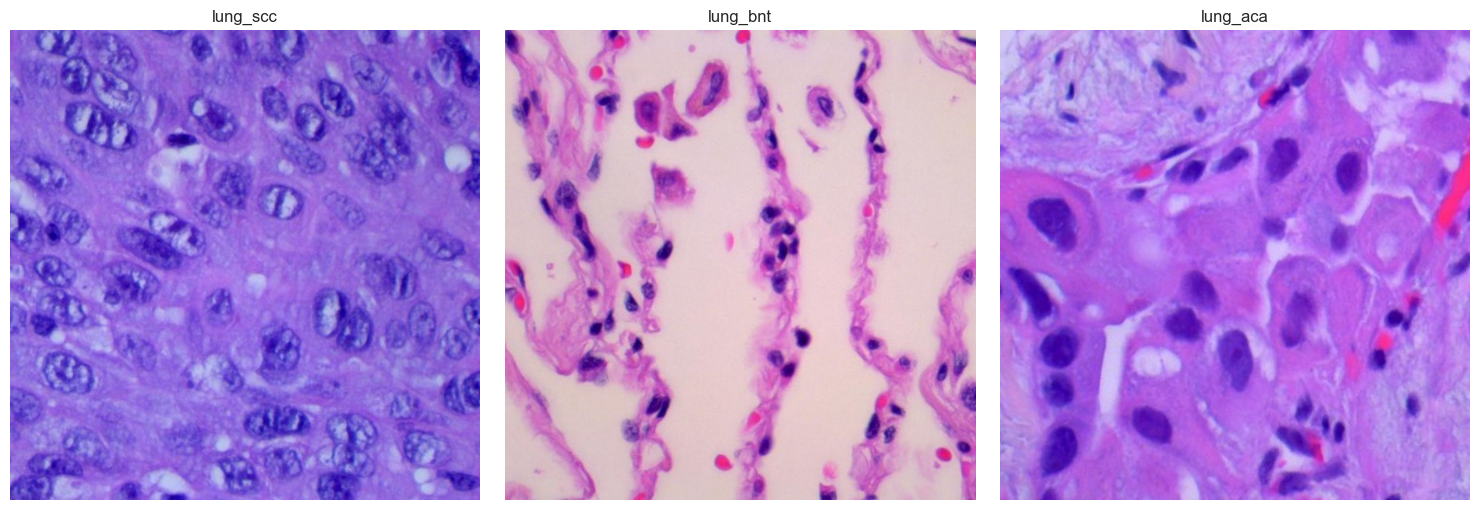

In [12]:
# Sample Images - Lung Cancer
plt.figure(figsize=(15, 5))
for i, (class_name, img) in enumerate(lung_samples.items()):
    plt.subplot(1, len(lung_samples), i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()
plt.close()

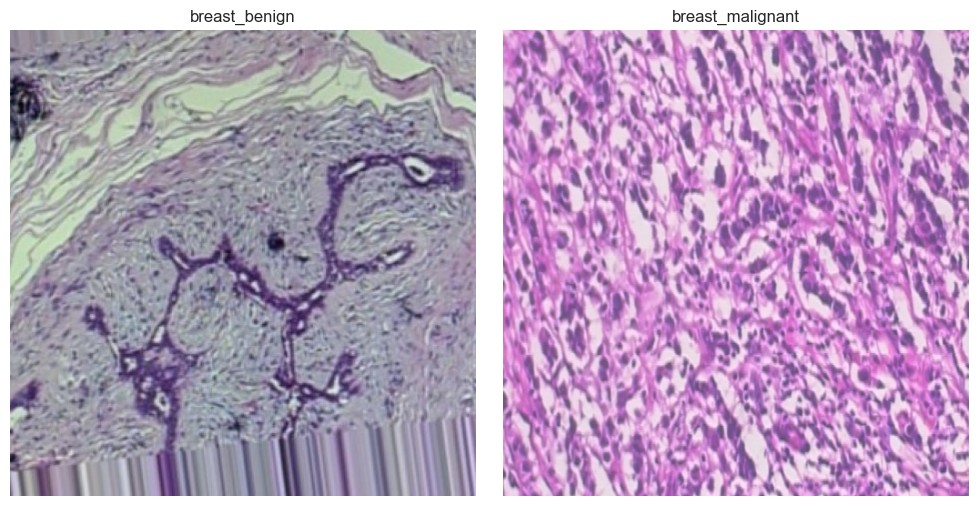

In [13]:
# Sample Images - Breast Cancer
plt.figure(figsize=(10, 5))
for i, (class_name, img) in enumerate(breast_samples.items()):
    plt.subplot(1, len(breast_samples), i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()
plt.close()


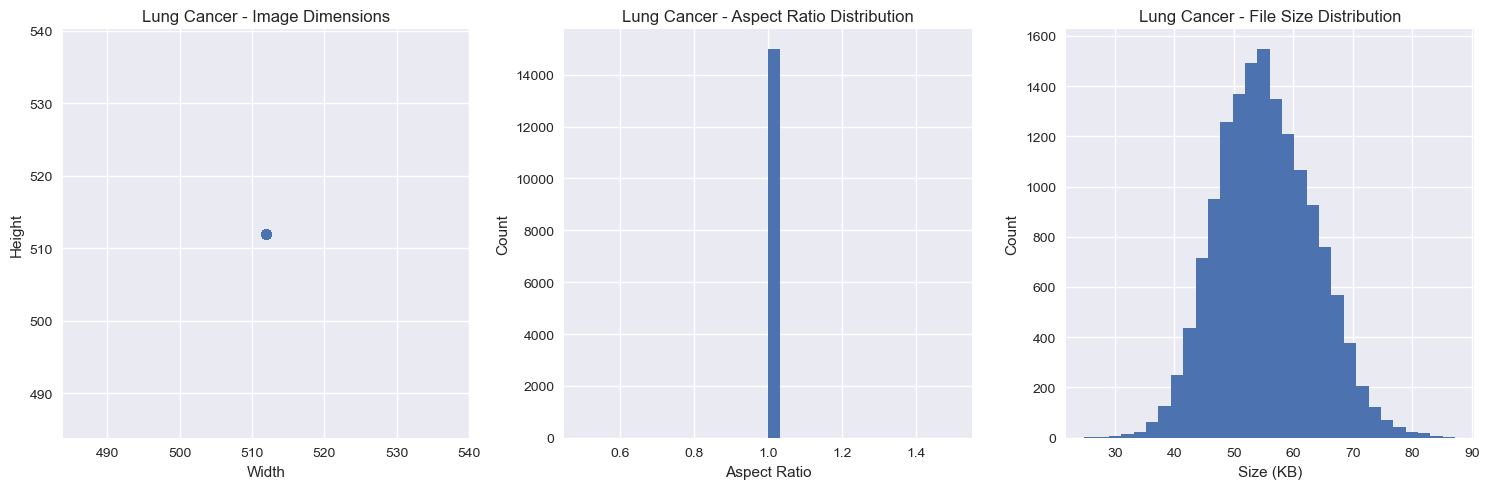

In [14]:
# Image Properties - Lung Cancer
plt.figure(figsize=(15, 5))

# Image dimensions
plt.subplot(1, 3, 1)
sizes = np.array(lung_stats['image_sizes'])
plt.scatter(sizes[:, 1], sizes[:, 0], alpha=0.5)
plt.title('Lung Cancer - Image Dimensions')
plt.xlabel('Width')
plt.ylabel('Height')

# Aspect ratios
plt.subplot(1, 3, 2)
plt.hist(lung_stats['aspect_ratios'], bins=30)
plt.title('Lung Cancer - Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Count')

# File sizes
plt.subplot(1, 3, 3)
plt.hist(lung_stats['file_sizes'], bins=30)
plt.title('Lung Cancer - File Size Distribution')
plt.xlabel('Size (KB)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
plt.close()

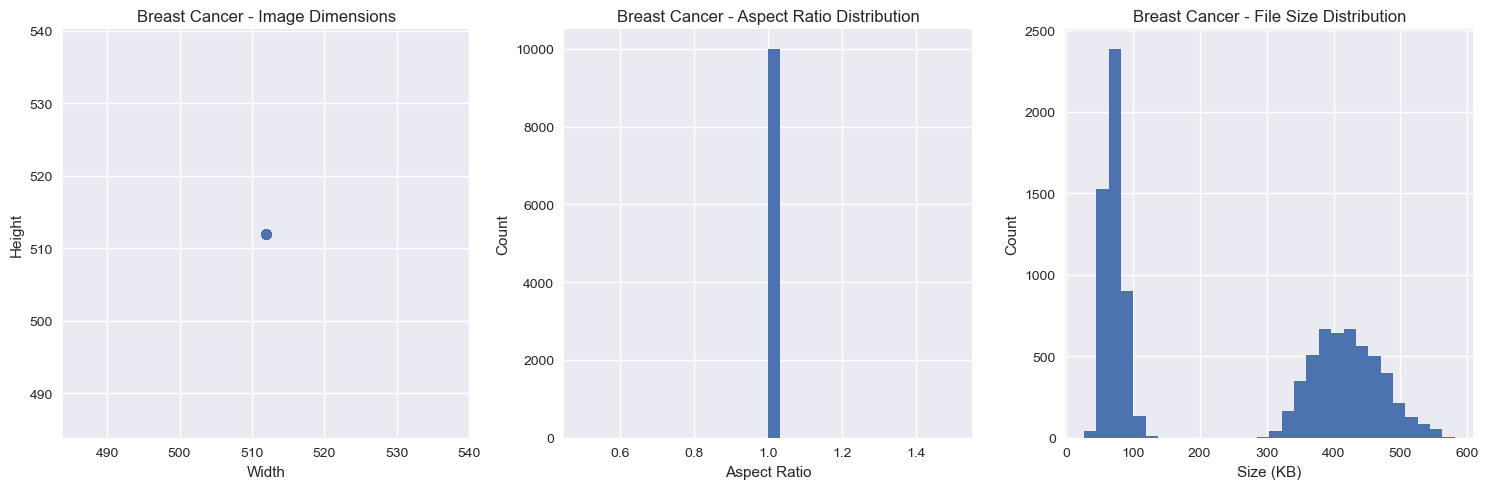

In [15]:
# Image Properties - Breast Cancer
plt.figure(figsize=(15, 5))

# Image dimensions
plt.subplot(1, 3, 1)
sizes = np.array(breast_stats['image_sizes'])
plt.scatter(sizes[:, 1], sizes[:, 0], alpha=0.5)
plt.title('Breast Cancer - Image Dimensions')
plt.xlabel('Width')
plt.ylabel('Height')

# Aspect ratios
plt.subplot(1, 3, 2)
plt.hist(breast_stats['aspect_ratios'], bins=30)
plt.title('Breast Cancer - Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Count')

# File sizes
plt.subplot(1, 3, 3)
plt.hist(breast_stats['file_sizes'], bins=30)
plt.title('Breast Cancer - File Size Distribution')
plt.xlabel('Size (KB)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
plt.close()

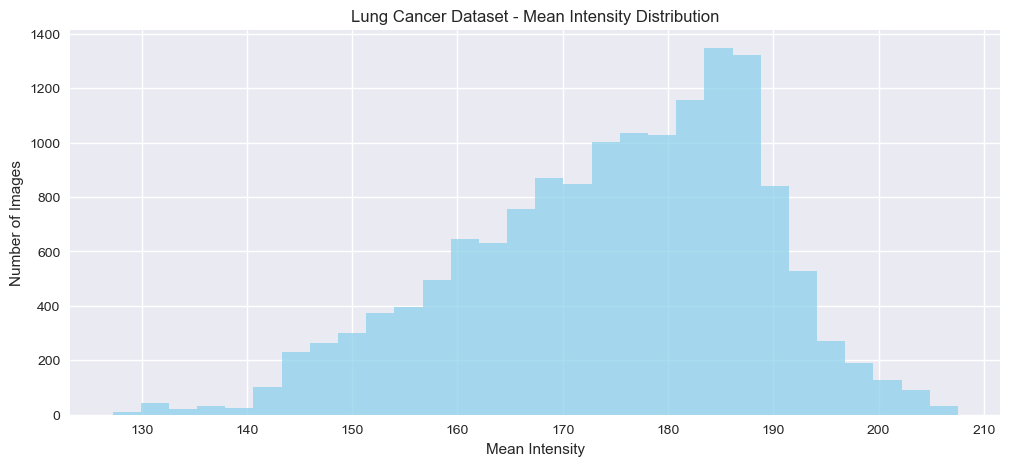

In [16]:
# Distribution of Mean Intensities (Lung Cancer)
plt.figure(figsize=(12, 5))
plt.hist(lung_stats['mean_intensities'], bins=30, color='skyblue', alpha=0.7)
plt.title('Lung Cancer Dataset - Mean Intensity Distribution')
plt.xlabel('Mean Intensity')
plt.ylabel('Number of Images')
plt.grid(True)
plt.show()
plt.close()

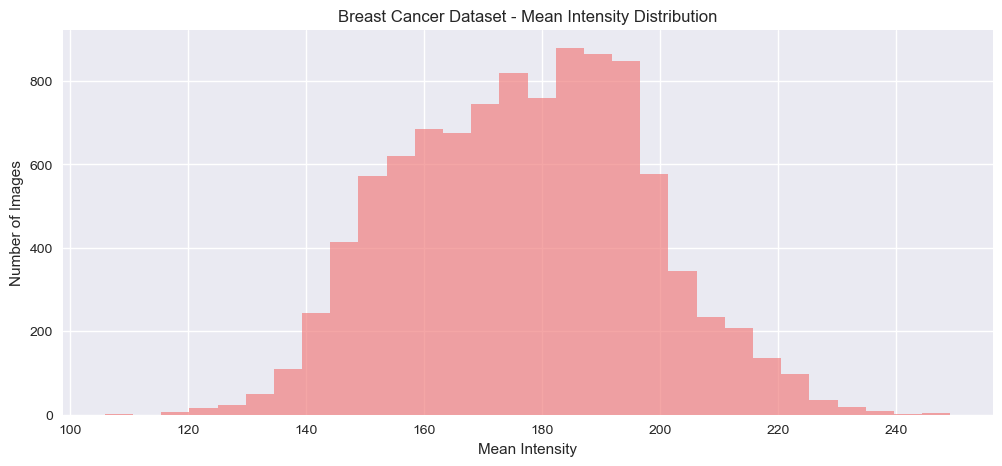

In [17]:
#  Distribution of Mean Intensities (Breast Cancer)
plt.figure(figsize=(12, 5))
plt.hist(breast_stats['mean_intensities'], bins=30, color='lightcoral', alpha=0.7)
plt.title('Breast Cancer Dataset - Mean Intensity Distribution')
plt.xlabel('Mean Intensity')
plt.ylabel('Number of Images')
plt.grid(True)
plt.show()
plt.close()


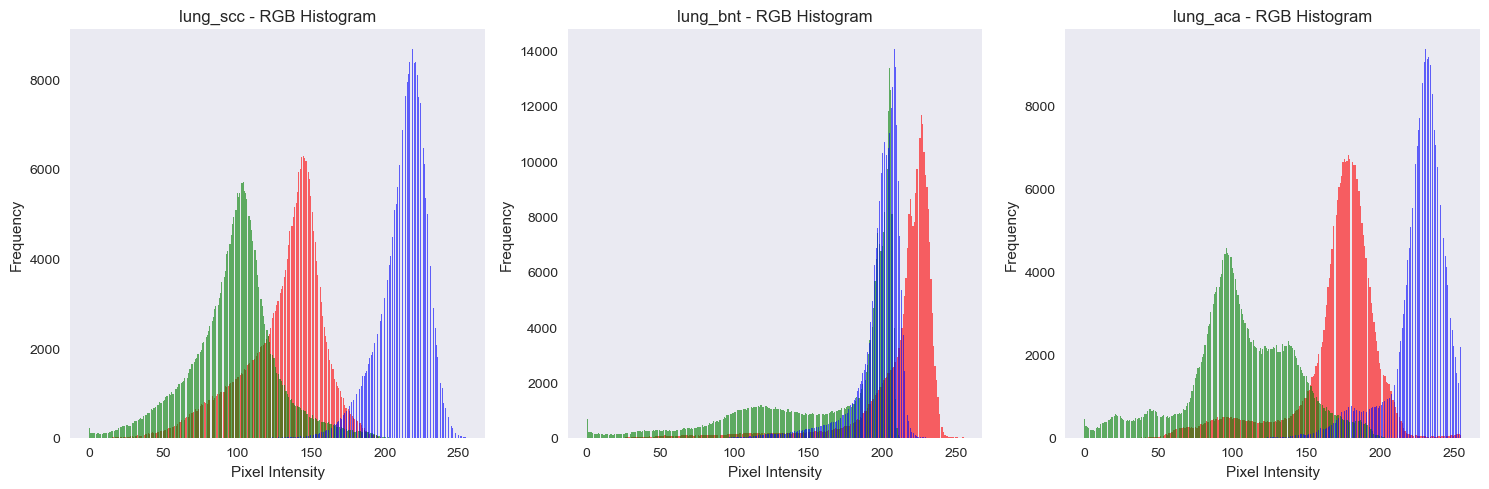

In [18]:
# Color Channel Histograms (Lung Sample Image)
plt.figure(figsize=(15, 5))
for i, (class_name, img) in enumerate(lung_samples.items()):
    plt.subplot(1, len(lung_samples), i + 1)
    for channel, color in zip(range(3), ['r', 'g', 'b']):
        plt.hist(img[:, :, channel].ravel(), bins=256, color=color, alpha=0.6)
    plt.title(f'{class_name} - RGB Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(False)
plt.tight_layout()
plt.show()
plt.close()


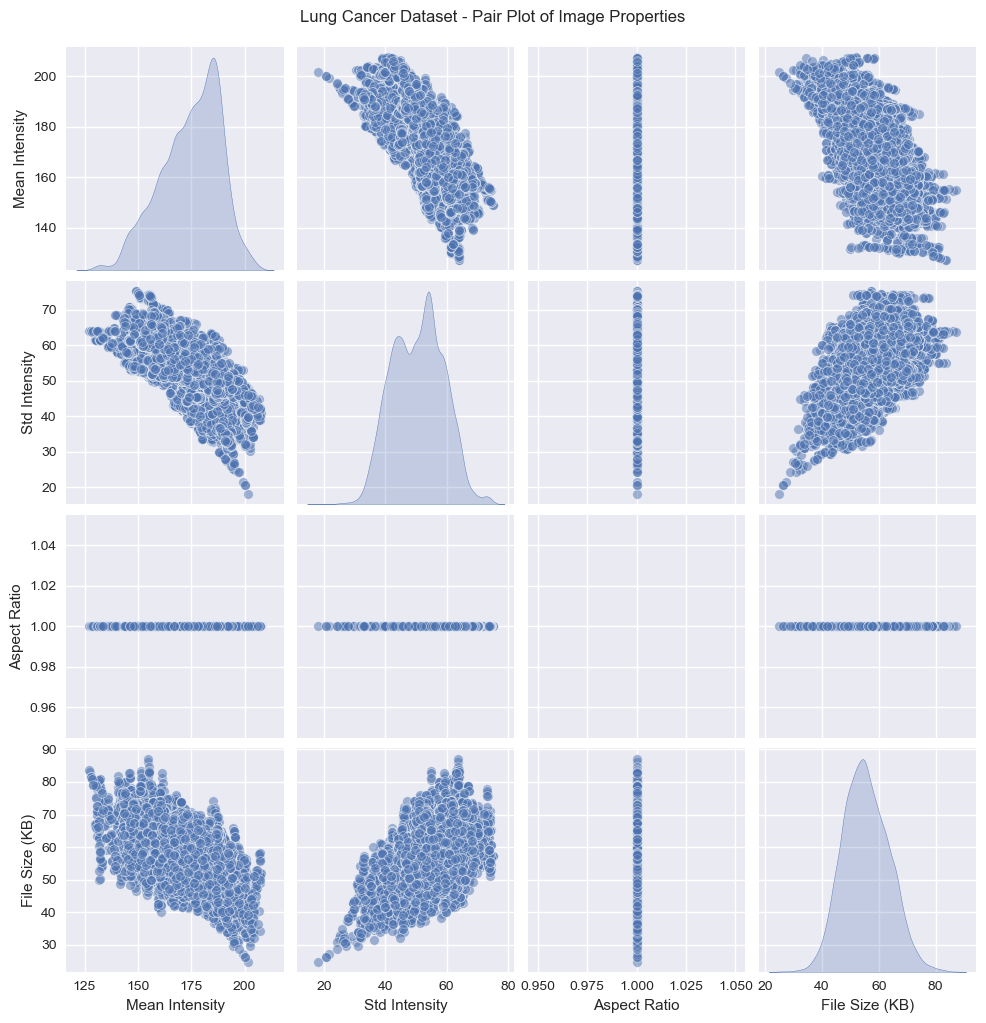

In [19]:
# Pair Plot of Lung Image Properties
lung_df = pd.DataFrame({
    'Mean Intensity': lung_stats['mean_intensities'],
    'Std Intensity': lung_stats['std_intensities'],
    'Aspect Ratio': lung_stats['aspect_ratios'],
    'File Size (KB)': lung_stats['file_sizes']
})
sns.pairplot(lung_df, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Lung Cancer Dataset - Pair Plot of Image Properties', y=1.02)
plt.show()
plt.close()


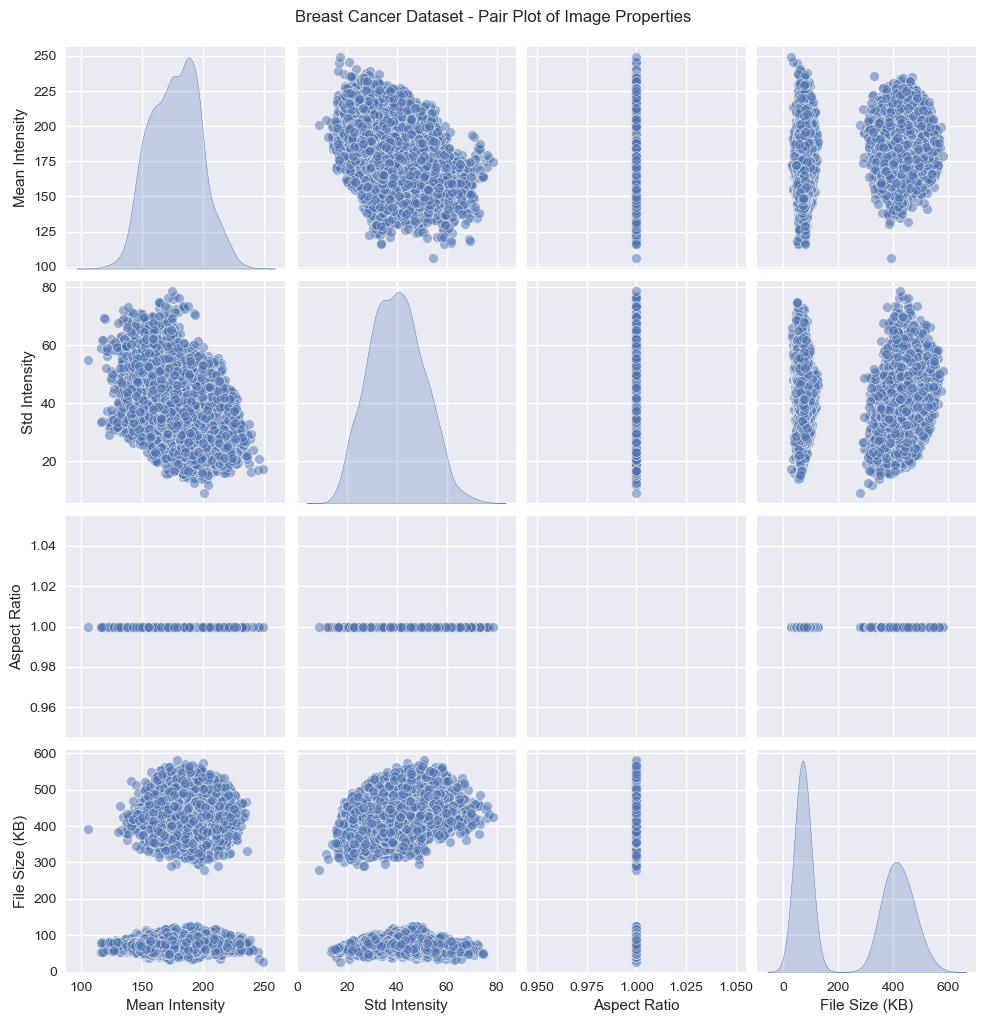

In [20]:
# Pair Plot of Breast Image Properties
breast_df = pd.DataFrame({
    'Mean Intensity': breast_stats['mean_intensities'],
    'Std Intensity': breast_stats['std_intensities'],
    'Aspect Ratio': breast_stats['aspect_ratios'],
    'File Size (KB)': breast_stats['file_sizes']
})
sns.pairplot(breast_df, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Breast Cancer Dataset - Pair Plot of Image Properties', y=1.02)
plt.show()
plt.close()

## Preprocessing 

In [32]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings("ignore")

In [33]:
# Lung Cancer Dataset Paths
lung_paths = {
    "Lung Adenocarcinoma": r"C:\Users\HP\Desktop\RR PAPER\Lung and Colon Cancer\lung_aca",
    "Lung Benign Tissue": r"C:\Users\HP\Desktop\RR PAPER\Lung and Colon Cancer\lung_bnt",
    "Lung Squamous Cell Carcinoma": r"C:\Users\HP\Desktop\RR PAPER\Lung and Colon Cancer\lung_scc"
}

# Breast Cancer Dataset Paths
breast_paths = {
    "Breast Benign": r"C:\Users\HP\Desktop\RR PAPER\Breast Cancer\breast_benign",
    "Breast Malignant": r"C:\Users\HP\Desktop\RR PAPER\Breast Cancer\breast_malignant"
}

In [34]:
# Load and preprocess 100 images per class
def load_and_preprocess_images(paths, target_size=(224, 224)):
    X = []
    y = []
    label_encoder = LabelEncoder()
    
    for class_name, path in paths.items():
        class_files = os.listdir(path)[:100]  # Use 100 samples per class
        for img_name in class_files:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, target_size)
                img = img / 255.0  # Normalize pixel values
                X.append(img)
                y.append(class_name)
    
    y = label_encoder.fit_transform(y)
    return np.array(X), np.array(y)

In [35]:
# Load Lung Cancer Dataset
lung_X, lung_y = load_and_preprocess_images(lung_paths)

# Load Breast Cancer Dataset
breast_X, breast_y = load_and_preprocess_images(breast_paths)

# Split datasets into train and test
lung_X_train, lung_X_test, lung_y_train, lung_y_test = train_test_split(
    lung_X, lung_y, test_size=0.2, random_state=42)

breast_X_train, breast_X_test, breast_y_train, breast_y_test = train_test_split(
    breast_X, breast_y, test_size=0.2, random_state=42)


## Model Training  and  optimization

In [36]:
# Create and train lung cancer model
lung_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(lung_paths), activation='softmax')
])


In [37]:
lung_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

lung_checkpoint = ModelCheckpoint('lung_model_best.h5', monitor='val_accuracy', save_best_only=True)
lung_early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

lung_model.fit(
    lung_X_train, lung_y_train,
    epochs=50,
    batch_size=32,
    validation_data=(lung_X_test, lung_y_test),
    callbacks=[lung_checkpoint, lung_early_stopping]
)


Epoch 1/50
8/8 [==============================] - 29s 3s/step - loss: 8.8138 - accuracy: 0.4417 - val_loss: 0.9212 - val_accuracy: 0.6333
Epoch 2/50
8/8 [==============================] - 13s 2s/step - loss: 1.0301 - accuracy: 0.5917 - val_loss: 0.7823 - val_accuracy: 0.5167
Epoch 3/50
8/8 [==============================] - 13s 2s/step - loss: 0.6396 - accuracy: 0.6583 - val_loss: 0.5915 - val_accuracy: 0.6167
Epoch 4/50
8/8 [==============================] - 19s 3s/step - loss: 0.5415 - accuracy: 0.6958 - val_loss: 0.5124 - val_accuracy: 0.6833
Epoch 5/50
8/8 [==============================] - 17s 2s/step - loss: 0.5075 - accuracy: 0.7250 - val_loss: 0.5016 - val_accuracy: 0.7333
Epoch 6/50
8/8 [==============================] - 12s 2s/step - loss: 0.5143 - accuracy: 0.7542 - val_loss: 0.5109 - val_accuracy: 0.7000
Epoch 7/50
8/8 [==============================] - 12s 1s/step - loss: 0.4511 - accuracy: 0.7625 - val_loss: 0.5128 - val_accuracy: 0.6333
Epoch 8/50
8/8 [==================

In [38]:
# train breast cancer model
breast_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(breast_paths), activation='softmax')
])

In [39]:
breast_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

breast_checkpoint = ModelCheckpoint('breast_model_best.h5', monitor='val_accuracy', save_best_only=True)
breast_early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

breast_model.fit(
    breast_X_train, breast_y_train,
    epochs=50,
    batch_size=32,
    validation_data=(breast_X_test, breast_y_test),
    callbacks=[breast_checkpoint, breast_early_stopping]
)

print("Models trained and saved successfully.")

Epoch 1/50
5/5 [==============================] - 20s 4s/step - loss: 8.0028 - accuracy: 0.5125 - val_loss: 8.1334 - val_accuracy: 0.4750
Epoch 2/50
5/5 [==============================] - 14s 3s/step - loss: 2.7768 - accuracy: 0.5500 - val_loss: 0.7408 - val_accuracy: 0.5250
Epoch 3/50
5/5 [==============================] - 8s 2s/step - loss: 0.6991 - accuracy: 0.5250 - val_loss: 0.6213 - val_accuracy: 0.5250
Epoch 4/50
5/5 [==============================] - 7s 1s/step - loss: 0.6237 - accuracy: 0.5188 - val_loss: 0.6084 - val_accuracy: 0.5250
Epoch 5/50
5/5 [==============================] - 14s 3s/step - loss: 0.5732 - accuracy: 0.6562 - val_loss: 0.4815 - val_accuracy: 0.7250
Epoch 6/50
5/5 [==============================] - 14s 3s/step - loss: 0.4123 - accuracy: 0.8250 - val_loss: 0.3087 - val_accuracy: 0.9250
Epoch 7/50
5/5 [==============================] - 7s 1s/step - loss: 0.6164 - accuracy: 0.6500 - val_loss: 0.4123 - val_accuracy: 0.8750
Epoch 8/50
5/5 [=====================

In [41]:
import matplotlib.pyplot as plt

# training history
lung_history = lung_model.fit(
    lung_X_train, lung_y_train,
    epochs=50,
    batch_size=32,
    validation_data=(lung_X_test, lung_y_test),
    callbacks=[lung_checkpoint, lung_early_stopping]
).history

breast_history = breast_model.fit(
    breast_X_train, breast_y_train,
    epochs=50,
    batch_size=32,
    validation_data=(breast_X_test, breast_y_test),
    callbacks=[breast_checkpoint, breast_early_stopping]
).history


Epoch 1/50
8/8 [==============================] - 10s 1s/step - loss: 0.3232 - accuracy: 0.8625 - val_loss: 0.5069 - val_accuracy: 0.7167
Epoch 2/50
8/8 [==============================] - 10s 1s/step - loss: 0.3421 - accuracy: 0.8333 - val_loss: 0.5983 - val_accuracy: 0.6167
Epoch 3/50
8/8 [==============================] - 11s 1s/step - loss: 0.3603 - accuracy: 0.8542 - val_loss: 0.5227 - val_accuracy: 0.6333
Epoch 4/50
8/8 [==============================] - 13s 2s/step - loss: 0.2683 - accuracy: 0.8708 - val_loss: 0.4713 - val_accuracy: 0.7000
Epoch 5/50
8/8 [==============================] - 16s 2s/step - loss: 0.1809 - accuracy: 0.9458 - val_loss: 0.5180 - val_accuracy: 0.7500
Epoch 6/50
8/8 [==============================] - 12s 2s/step - loss: 0.1581 - accuracy: 0.9500 - val_loss: 0.5955 - val_accuracy: 0.7833
Epoch 7/50
8/8 [==============================] - 11s 1s/step - loss: 0.1078 - accuracy: 0.9792 - val_loss: 0.5716 - val_accuracy: 0.7500
Epoch 8/50
8/8 [==================

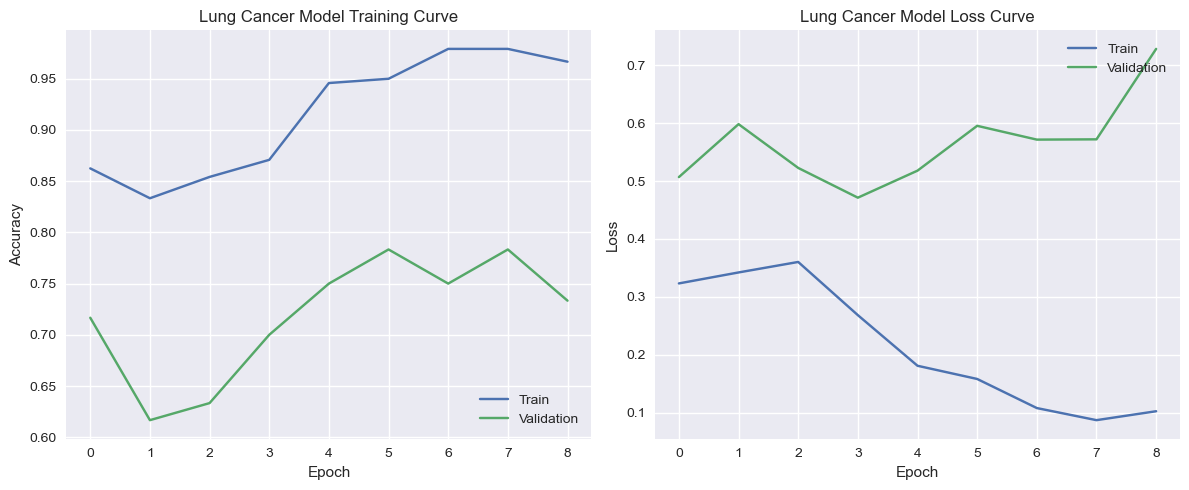

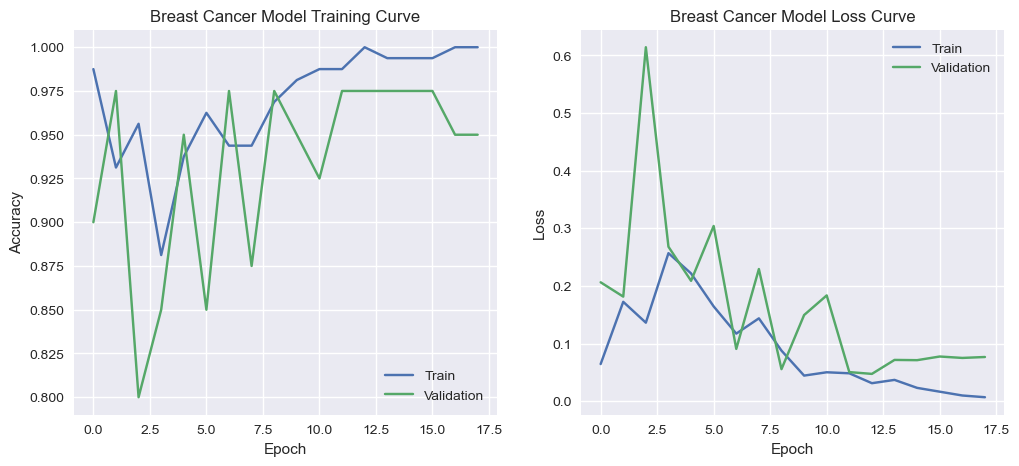

In [42]:
# training curves
plt.style.use('seaborn')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lung_history['accuracy'])
plt.plot(lung_history['val_accuracy'])
plt.title('Lung Cancer Model Training Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(lung_history['loss'])
plt.plot(lung_history['val_loss'])
plt.title('Lung Cancer Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(breast_history['accuracy'])
plt.plot(breast_history['val_accuracy'])
plt.title('Breast Cancer Model Training Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(breast_history['loss'])
plt.plot(breast_history['val_loss'])
plt.title('Breast Cancer Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout
plt.show()
plt.close()


## Model Evaluation

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model

# trained models
lung_model = load_model('lung_model_best.h5')
breast_model = load_model('breast_model_best.h5')

# Lung Cancer Model
print("\n=== Lung Cancer Model Evaluation ===")
lung_X_test, lung_y_test = load_and_preprocess_images(lung_paths)
lung_loss, lung_acc = lung_model.evaluate(lung_X_test, lung_y_test)
print(f"Lung Cancer Model Test Accuracy: {lung_acc:.4f}")

lung_y_pred = lung_model.predict(lung_X_test)
lung_y_pred = np.argmax(lung_y_pred, axis=1)



=== Lung Cancer Model Evaluation ===
10/10 [==============================] - 24s 271ms/step - loss: 0.2423 - accuracy: 0.9033
Lung Cancer Model Test Accuracy: 0.9033
10/10 [==============================] - 5s 196ms/step


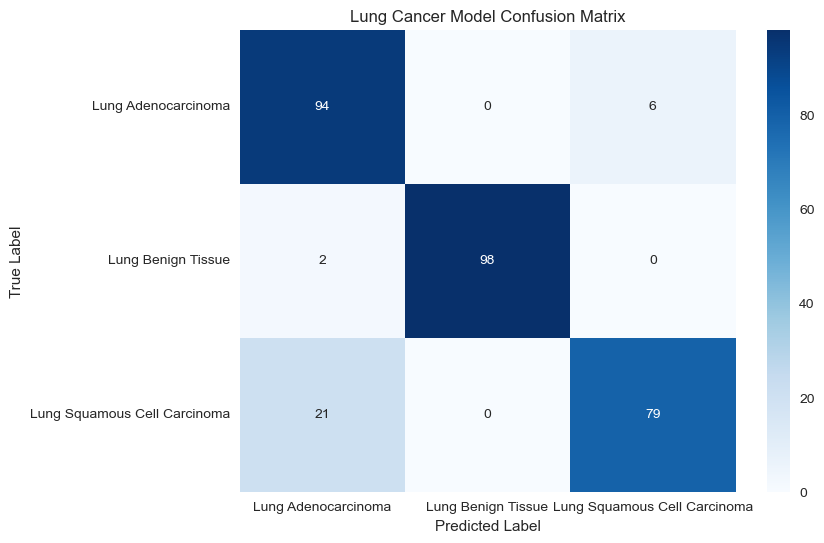

In [27]:
# Confusion Matrix
lung_conf_matrix = confusion_matrix(lung_y_test, lung_y_pred)
lung_class_names = list(lung_paths.keys())

plt.figure(figsize=(8, 6))
plt.title('Lung Cancer Model Confusion Matrix')
sns.heatmap(lung_conf_matrix, annot=True, cmap='Blues', xticklabels=lung_class_names, yticklabels=lung_class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
plt.close()

In [28]:
# Classification Report
lung_report = classification_report(lung_y_test, lung_y_pred, target_names=lung_class_names)
print("\nLung Cancer Model Classification Report:\n", lung_report)



Lung Cancer Model Classification Report:
                               precision    recall  f1-score   support

         Lung Adenocarcinoma       0.80      0.94      0.87       100
          Lung Benign Tissue       1.00      0.98      0.99       100
Lung Squamous Cell Carcinoma       0.93      0.79      0.85       100

                    accuracy                           0.90       300
                   macro avg       0.91      0.90      0.90       300
                weighted avg       0.91      0.90      0.90       300



In [29]:
# Evaluate the Breast Cancer Model
print("\n=== Breast Cancer Model Evaluation ===")
breast_X_test, breast_y_test = load_and_preprocess_images(breast_paths)
breast_loss, breast_acc = breast_model.evaluate(breast_X_test, breast_y_test)
print(f"Breast Cancer Model Test Accuracy: {breast_acc:.4f}")

breast_y_pred = breast_model.predict(breast_X_test)
breast_y_pred = np.argmax(breast_y_pred, axis=1)



=== Breast Cancer Model Evaluation ===
7/7 [==============================] - 3s 177ms/step - loss: 0.0744 - accuracy: 0.9900
Breast Cancer Model Test Accuracy: 0.9900
7/7 [==============================] - 1s 179ms/step


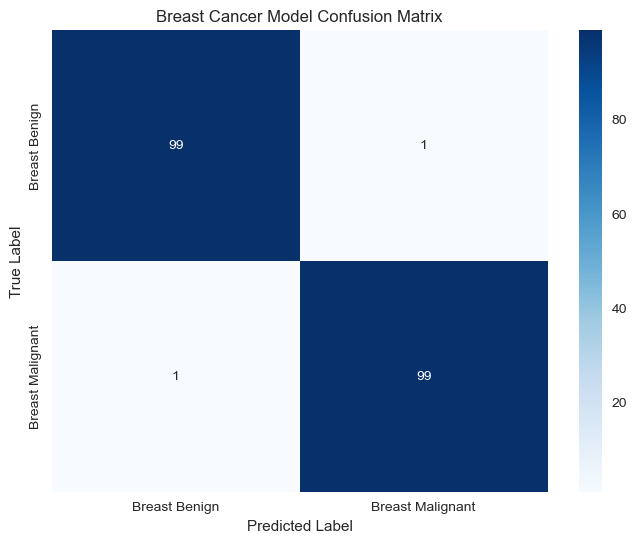

In [30]:
# Confusion Matrix
breast_conf_matrix = confusion_matrix(breast_y_test, breast_y_pred)
breast_class_names = list(breast_paths.keys())

plt.figure(figsize=(8, 6))
plt.title('Breast Cancer Model Confusion Matrix')
sns.heatmap(breast_conf_matrix, annot=True, cmap='Blues', xticklabels=breast_class_names, yticklabels=breast_class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
plt.close()


In [31]:
# Classification Report
breast_report = classification_report(breast_y_test, breast_y_pred, target_names=breast_class_names)
print("\nBreast Cancer Model Classification Report:\n", breast_report)


Breast Cancer Model Classification Report:
                   precision    recall  f1-score   support

   Breast Benign       0.99      0.99      0.99       100
Breast Malignant       0.99      0.99      0.99       100

        accuracy                           0.99       200
       macro avg       0.99      0.99      0.99       200
    weighted avg       0.99      0.99      0.99       200

